# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

We first load the data containing the shopping reviews from `review.csv` file. 

In [1]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


We confirm that there are no empty values. Columns are text or integer.

## Preparing features (`X`) & target (`y`)

We isolate **features** (X) from the **target** (y)

In [2]:
# Removing reviews with Age over 80 (see Data Exploration for details)
df_clean = df[df['Age'] < 80]

In [3]:
data = df_clean

# Separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()
# Show values in target column and sample of features table
print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


Now that we've separated features from target, we can define **train** and **test** sets for our machine learning.

In [4]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    stratify=y, # To ensure proportions in train and test sets are similar
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

Before working on a pipeline, we'll explore the data and ensure that it is ready. Let's first start with **numerical data**.

In [5]:
df.describe()

,Clothing ID,Age,Positive Feedback Count,Recommended IND
count,18442.000000,18442.000000,18442.000000,18442.000000
mean,954.896757,43.383635,2.697484,0.816235
std,141.571783,12.246264,5.942220,0.387303
min,2.000000,18.000000,0.000000,0.000000
25%,863.000000,34.000000,0.000000,1.000000
50%,952.000000,41.000000,1.000000,1.000000
75%,1078.000000,52.000000,3.000000,1.000000
max,1205.000000,99.000000,122.000000,1.000000


At first look, we don't see incoherences in the dataset.  
- `Clothing ID` is a unique identifier for each clothe. It is therefore more a categorical value than a numerical one.  
- `Age` goes from 18 to 99. That last one sounds more like a maximum age possible. We'll check later if there are any outbound values to ignore.
- `Positive Feedback Count` looks normal and coherent. We'll check nonetheless value distribution to ensure there are no outbound values.
- `Recommended IND` goes from 0 to 1, no surprise here. 

In [6]:
# We confirm that Clothing ID is a categorical value
df['Clothing ID'].value_counts()

Clothing ID
1078    871
862     658
1094    651
1081    487
829     452
       ... 
1181      1
568       1
887       1
63        1
978       1
Name: count, Length: 531, dtype: int64

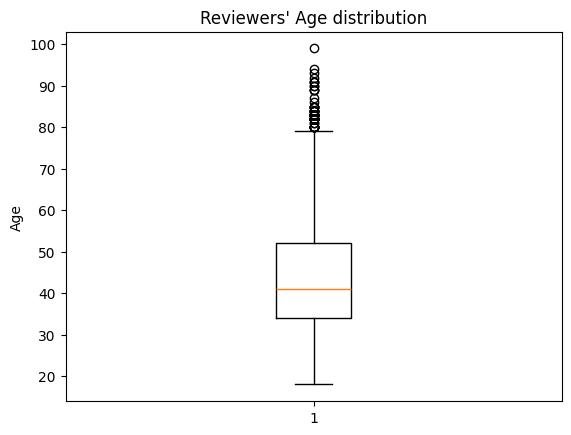

In [7]:
# Let's make a box plot to see value distribution for Age
import matplotlib.pyplot as plt

plt.boxplot(df['Age'])
plt.title("Reviewers' Age distribution")
plt.ylabel('Age')
plt.show()

We can see that Reviews with an age **over 80** could be considered as outbound values. In order to optimize our model, we decided to remove those as done in previous step.

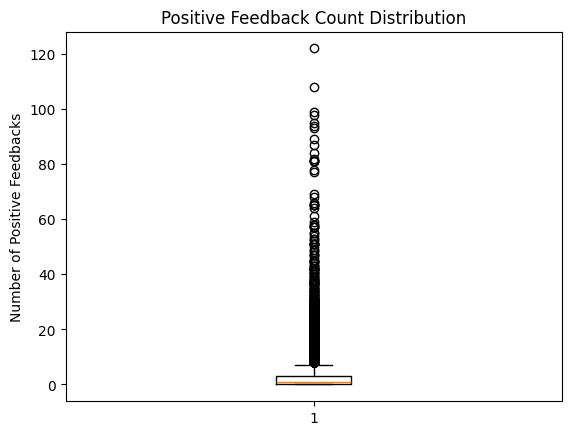

In [8]:
# Let's observe data distribution for Positive Feedback Count
import matplotlib.pyplot as plt

plt.boxplot(df['Positive Feedback Count'])
plt.title('Positive Feedback Count Distribution')
plt.ylabel('Number of Positive Feedbacks')
plt.show()

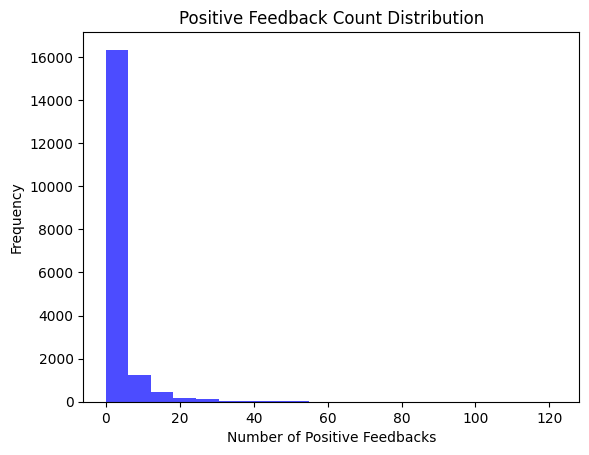

In [9]:
# To complete our exploration of Positive Feedback, we'll represent them in bar charts too.
plt.hist(df['Positive Feedback Count'], bins=20, alpha=0.7, color='blue')
plt.title('Positive Feedback Count Distribution')
plt.xlabel('Number of Positive Feedbacks')
plt.ylabel('Frequency')
plt.show()

As most of the reviews don't have positive feedback or very few, most of the reviews over 10 positive feedbacks are considered as out of range. In our case, those reviews are very significative and shouldn't be removed.

Let's now have a look on **text data**. We'll focus on columns others than `Title` and `Reviews` which are pure text.

In [10]:
# Let's see the values contained in Division Name column
df['Division Name'].value_counts()

Division Name
General           11664
General Petite     6778
Name: count, dtype: int64

In [11]:
# Distinct values in Department Name column
df['Department Name'].value_counts()

Department Name
Tops        8713
Dresses     5371
Bottoms     3184
Jackets      879
Intimate     188
Trend        107
Name: count, dtype: int64

In [12]:
# Distinct values in Class Name column
df['Class Name'].value_counts()

Class Name
Dresses           5371
Knits             3981
Blouses           2587
Sweaters          1218
Pants             1157
Jeans              970
Fine gauge         927
Skirts             796
Jackets            598
Outerwear          281
Shorts             260
Lounge             188
Trend              107
Casual bottoms       1
Name: count, dtype: int64

Each one of the columns describe, respectively, the ``size``, the ``category`` and the ``type`` of clothe. It confirms those columns are **categorical data**.

Eventually, let's have a look to `Recommended IND` column.

In [13]:
# We'll observe the number of occurences for each value of Recommended IND
df['Recommended IND'].value_counts()

Recommended IND
1    15053
0     3389
Name: count, dtype: int64

We see that the dataset is imbalanced as **80%** of traget results are **1**. That's the reason why using ``stratify=y`` in **train_test_split()** is mandatory to ensure unbiased results. This is also to take into account in our final metrics to ensure reliability of our results. 

Based on our exploration we can separate data in **numerical**, **categorical** and **text** features.

In [14]:
from sklearn.pipeline import Pipeline



num_features = (
    X
    .select_dtypes(exclude='object').columns
    .drop(['Clothing ID']) # We consider all numerical columns except for Clothing ID
)
print('Numerical features are :', num_features)

cat_features = (
    X[['Clothing ID','Division Name','Department Name','Class Name']].columns
) # We consider all categorical ata seen above, including Clothing ID
print('Categorical features are :', cat_features)

text_features = (
    X[['Title','Review Text']].columns
) # We consider the review content, Title and Review Text
print('Review Text features :', text_features)

Numerical features are : Index(['Age', 'Positive Feedback Count'], dtype='object')
Categorical features are : Index(['Clothing ID', 'Division Name', 'Department Name', 'Class Name'], dtype='object')
Review Text features : Index(['Title', 'Review Text'], dtype='object')


## Building Pipeline

We'll now build our pipeline, starting by **numerical data**.

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
    (
        'imputer',
        SimpleImputer(strategy='mean'), # We define our strategy in case of missing data
    ),
    (
        'scaler',
        MinMaxScaler(), # We normalize numerical data
    ),
])

num_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler())])

Second, we work on **categorical data**.

In [16]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    (
        'ordinal_encoder',
        OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=-1,
        ) # Convert categories into numerical values, -1 for unknown values (not seen in train set)
    ),    
    (
        'imputer',
        SimpleImputer(
            strategy='most_frequent',
        ) # Define how to handle missing values, here replacing them by the most frequent one
    ),
    (
        'cat_encoder',
        OneHotEncoder(
            sparse_output=False,
            handle_unknown='ignore',
        ) # Convert every value in a binary column 
    ),
])

cat_pipeline

Pipeline(steps=[('ordinal_encoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('cat_encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

And, ultimately, we deal with **text data**.

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

# We define a class able to count identified characters
class CountCharacter(BaseEstimator, TransformerMixin):
    def __init__(self, character: str):
        self.character = character

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        
        return [[text.count(self.character)] for text in X ]

# We define an other class to merge all review data (Title and Body) in one
class ColumnMerger(BaseEstimator, TransformerMixin):
    def __init__(self, col1: str, col2: str):
        self.col1 = col1
        self.col2 = col2

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.col1].fillna('') + ' ' + X[self.col2].fillna('')  # Merging with a space in between

Once we have the functions, we can start building the pipeline for text data.

In [18]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# This pipeline prepare the data before applying counting character function
initial_text_preprocess = Pipeline([
    (
        'dimension_reshaper',
        FunctionTransformer(
            np.reshape,
            kw_args={'newshape':-1},
        ),
    ),
])

# This one applies the counting characters function on three different characters (' ', '!', '?')
feature_engineering = FeatureUnion([
    ('count_spaces', CountCharacter(character=' ')),
    ('count_exclamations', CountCharacter(character='!')),
    ('count_question_marks', CountCharacter(character='?')),
])

In [19]:
# Eventually, we combine all pipelines in the final text pipeline
character_counts_pipeline = Pipeline([
    (
        'column_merger',
        ColumnMerger(col1='Title', col2='Review Text'),
    ), # We first merge the review data
    (
        'initial_text_preprocess',
        initial_text_preprocess,
    ), # We prepare it for characters counting
    (
        'feature_engineering',
        feature_engineering,
    ), # We count characters
])
character_counts_pipeline

Pipeline(steps=[('column_merger',
                 ColumnMerger(col1='Title', col2='Review Text')),
                ('initial_text_preprocess',
                 Pipeline(steps=[('dimension_reshaper',
                                  FunctionTransformer(func=<function reshape at 0x7ff4600b98b0>,
                                                      kw_args={'newshape': -1}))])),
                ('feature_engineering',
                 FeatureUnion(transformer_list=[('count_spaces',
                                                 CountCharacter(character=' ')),
                                                ('count_exclamations',
                                                 CountCharacter(character='!')),
                                                ('count_question_marks',
                                                 CountCharacter(character='?'))]))])

To go deeper on text data, we'll work with **spaCy** library for **natural language processing**.

In [30]:
import spacy

try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    raise RuntimeError(
        "spaCy model 'en_core_web_sm' is not installed. "
        "Please run: '! python -m spacy download en_core_web_sm'"
    )

We build a function to lemmatize (keep only meaningful basic form of words) text reviews.

In [21]:
class SpacyLemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp

    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        lemmatized = [
            ' '.join(
                token.lemma_ for token in doc
                if not token.is_stop
            )
            for doc in self.nlp.pipe(X)
        ]
        return lemmatized 

As before, we use our `ColumnMerger` function to gather all review data in one place at the beginning of our pipeline.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_pipeline = Pipeline([
    (
        'column_merger',
        ColumnMerger(col1='Title', col2='Review Text'),
    ), # We first merge the review data
    (
        'dimension_reshaper',
        FunctionTransformer(
            np.reshape,
            kw_args={'newshape':-1},
        ),
    ), # We prepare data for further transformation steps
    (
        'lemmatizer',
        SpacyLemmatizer(nlp=nlp),
    ), # Text is lemmatized
    (
        'tfidf_vectorizer',
        TfidfVectorizer(
            stop_words='english',
        ), 
    ), # We "clean" the text by removing words with no meaningful value
])
tfidf_pipeline 

Pipeline(steps=[('column_merger',
                 ColumnMerger(col1='Title', col2='Review Text')),
                ('dimension_reshaper',
                 FunctionTransformer(func=<function reshape at 0x7ff4600b98b0>,
                                     kw_args={'newshape': -1})),
                ('lemmatizer',
                 SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x7ff42da88130>)),
                ('tfidf_vectorizer', TfidfVectorizer(stop_words='english'))])

Now that we have our pipelines defined for every type of data, we combine them in one final pipeline we can apply on our dataset for training.

In [23]:
from sklearn.compose import ColumnTransformer

feature_engineering = ColumnTransformer([
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features),
        ('character_counts', character_counts_pipeline, text_features),
        ('tfidf_text', tfidf_pipeline, text_features),
])

feature_engineering

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 Index(['Age', 'Positive Feedback Count'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHot...
                                 Pipeline(steps=[('column_merger',
                                                  ColumnMerger(col1='Title',
                                                               col2='Review '
                                                                    'Text')),
                                                 ('dimension_reshaper',
                                                  FunctionTransformer(func=<function reshape at 0x7ff4600b98b0>,
                                                                      kw_args={'newshape': -1})),
                                                 ('lemmatizer',
                                                  SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x7ff42da88130>)),
                                                 ('tfidf_vectorizer',
                                                  TfidfVectorizer(stop_words='english'))]),
                                 Index(['Title', 'Review Text'], dtype='object'))])

## Training Pipeline

It is now time to train our Pipeline on the train dataset. We chose for that a Random Forest Classifier that we will apply at the end, once all data is prepared.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Defining complete pipeline
model_pipeline = make_pipeline(
    feature_engineering, # our previous pipeline
    RandomForestClassifier(random_state=27), # Our machine learning model
)

# Applying our pipeline to the train dataset
model_pipeline.fit(X_train, y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'Positive Feedback Count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='m...
                                                                  ('dimension_reshaper',
                                                                   FunctionTransformer(func=<function reshape at 0x7ff4600b98b0>,
                                                                                       kw_args={'newshape': -1})),
                                                                  ('lemmatizer',
                                                                   SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x7ff42da88130>)),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer(stop_words='english'))]),
                                                  Index(['Title', 'Review Text'], dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=27))])

In [26]:
# We use classification_report to have an overview of different metrics
from sklearn.metrics import classification_report

y_pred_forest_pipeline = model_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_forest_pipeline))

              precision    recall  f1-score   support

           0       0.92      0.28      0.42       338
           1       0.86      0.99      0.92      1498

    accuracy                           0.86      1836
   macro avg       0.89      0.63      0.67      1836
weighted avg       0.87      0.86      0.83      1836



We get an accuracy of **86%**, which correct but far from perfect. Besides, when we look at ``precision``, ``recall`` and ``f1`` metrics, it clearly appears that our imbalanced dataset generates poor results to predict not recommended items, e.g. `Recommended IND` = 0.

## Fine-Tuning Pipeline

Let's try to improve our model by fine tuning it. We test 2 parameters, with 2-3 values.

In [27]:
from sklearn.model_selection import RandomizedSearchCV

# We work on 2 parameters of our Random Forest Classifier
my_distributions = dict(
    randomforestclassifier__max_features=[
        100,
        150,
        250,
    ],
    randomforestclassifier__n_estimators=[
        150,
        200,
    ],
)

param_search = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=my_distributions,
    n_iter=6,     # Try 6 different combinations of parameters
    cv=5,         # Use 5-fold cross-validation
    n_jobs=-1,    # Use all available processors (for multiprocessing)
    refit=True,   # Refit the model using the best parameters found
    verbose=3,    # Output of parameters, score, time
    random_state=27,
)

param_search.fit(X_train, y_train)

# Retrieve the best parameters
param_search.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 2/5] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=150;, score=0.857 total time= 1.8min
[CV 4/5] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=150;, score=0.854 total time= 1.8min
[CV 1/5] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=200;, score=0.861 total time= 1.9min
[CV 3/5] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=200;, score=0.857 total time= 2.0min
[CV 5/5] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=200;, score=0.855 total time= 1.9min


/opt/venv/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/5] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=150;, score=0.861 total time= 1.8min
[CV 3/5] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=150;, score=0.855 total time= 1.8min
[CV 5/5] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=150;, score=0.855 total time= 1.8min
[CV 2/5] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=200;, score=0.855 total time= 2.0min
[CV 4/5] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=200;, score=0.852 total time= 1.9min
[CV 1/5] END randomforestclassifier__max_features=150, randomforestclassifier__n_estimators=150;, score=0.864 total time= 1.8min
[CV 3/5] END randomforestclassifier__max_features=150, randomforestclassifier__n_estimators=150;, score=0.863 total time= 1.8min
[CV 5/5] END randomforestclassifier__max_features=150, randomforestclassifier__n_estimators=150;,

{'randomforestclassifier__n_estimators': 200,
 'randomforestclassifier__max_features': 250}

In [28]:
# We parametrize our model with the best parameters identified before
model_best = param_search.best_estimator_
model_best

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'Positive Feedback Count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='m...
                                                                   FunctionTransformer(func=<function reshape at 0x7ff4600b98b0>,
                                                                                       kw_args={'newshape': -1})),
                                                                  ('lemmatizer',
                                                                   SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x7ff3e4b5fcd0>)),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer(stop_words='english'))]),
                                                  Index(['Title', 'Review Text'], dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=250, n_estimators=200,
                                        random_state=27))])

[CV 2/5] END randomforestclassifier__max_features=150, randomforestclassifier__n_estimators=200;, score=0.866 total time= 1.9min
[CV 4/5] END randomforestclassifier__max_features=150, randomforestclassifier__n_estimators=200;, score=0.863 total time= 1.9min
[CV 1/5] END randomforestclassifier__max_features=250, randomforestclassifier__n_estimators=150;, score=0.871 total time= 1.9min
[CV 3/5] END randomforestclassifier__max_features=250, randomforestclassifier__n_estimators=150;, score=0.873 total time= 1.9min
[CV 5/5] END randomforestclassifier__max_features=250, randomforestclassifier__n_estimators=150;, score=0.866 total time= 1.9min
[CV 2/5] END randomforestclassifier__max_features=250, randomforestclassifier__n_estimators=200;, score=0.873 total time= 2.0min
[CV 4/5] END randomforestclassifier__max_features=250, randomforestclassifier__n_estimators=200;, score=0.873 total time= 2.0min
[CV 5/5] END randomforestclassifier__max_features=250, randomforestclassifier__n_estimators=200;,

In [29]:
# And we test again the accuracy of our model after fine-tuning
y_pred_forest_pipeline = model_best.predict(X_test)

print(classification_report(y_test, y_pred_forest_pipeline))

              precision    recall  f1-score   support

           0       0.86      0.41      0.55       338
           1       0.88      0.99      0.93      1498

    accuracy                           0.88      1836
   macro avg       0.87      0.70      0.74      1836
weighted avg       0.88      0.88      0.86      1836



The final accuracy of our model is **88%**, improved by **2 points** compared with previous non optimized model. More precisely, we see a degradation of `precision` metrics but result is more homogeneous between 0s and 1s. For `recall` metrics, we improved the proportion of Os rightly predicted, eventhough **0.41** is not yet a tremendous result. Eventually, `f1-score` has also slightly improved.

In conclusion, our model improved after fine-tuning but, due to an imbalanced dataset, our metrics stay low on predicting negative reviews. Perhaps a deeper study of themmight underline some features we could include in our text pipeline to improve prediction.